In [ ]:
from matplotlib import pyplot as plt
import numpy as np

from PIL import Image
import keras

from keras.layers import InputLayer, Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import InputLayer, Dense
import pathlib

In [3]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
print(data_dir)

C:\Users\dell 5420\.keras\datasets\flower_photos


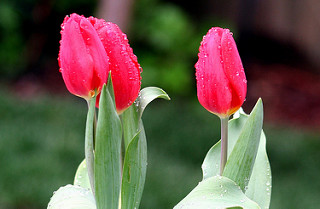

In [21]:
roses = list(data_dir.glob('tulips/*'))
Image.open(roses[0])

In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [7]:
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


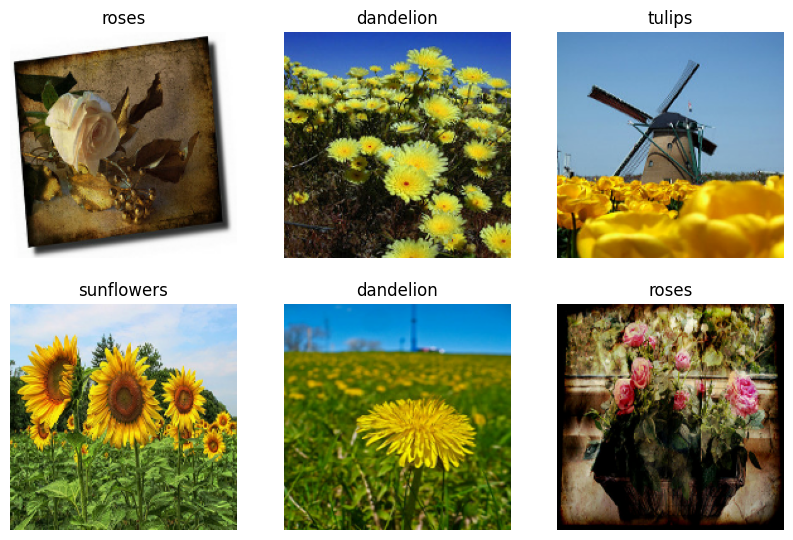

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
pre_trained = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180, 180, 3),
    pooling='avg',
    name="resnet50",
)

for layer in pre_trained.layers:
        layer.trainable=False


transfer_model = Sequential([
        InputLayer(shape=(180, 180, 3)),
        pre_trained,

        Flatten(),
        Dense(512, activation='relu'),
        Dense(5, activation='softmax')

])

transfer_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 226s 2us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [12]:
transfer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
epochs=10
history = transfer_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.6571 - loss: 1.3904 - val_accuracy: 0.8488 - val_loss: 0.4376
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.8937 - loss: 0.2822 - val_accuracy: 0.8583 - val_loss: 0.3664
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9387 - loss: 0.1667 - val_accuracy: 0.8706 - val_loss: 0.3683
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9631 - loss: 0.1099 - val_accuracy: 0.8774 - val_loss: 0.3781
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9796 - loss: 0.0672 - val_accuracy: 0.8828 - val_loss: 0.3747
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9930 - loss: 0.0353 - val_accuracy: 0.8842 - val_loss: 0.3908
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9979 - loss: 0.0182 - val_accuracy: 0.8883 - val_loss: 0.4109
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9997 - loss: 0.0092 - val_accuracy: 0.8801 - v

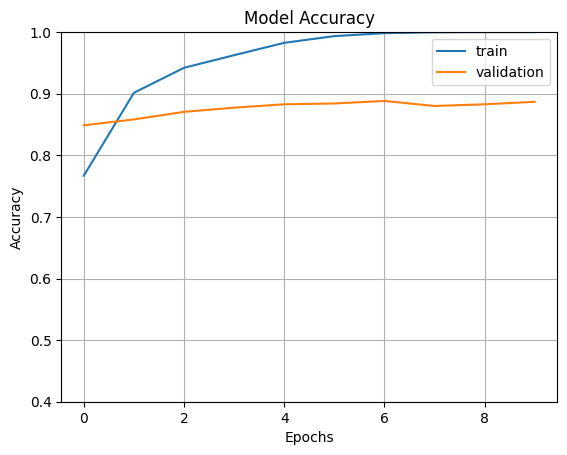

In [14]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

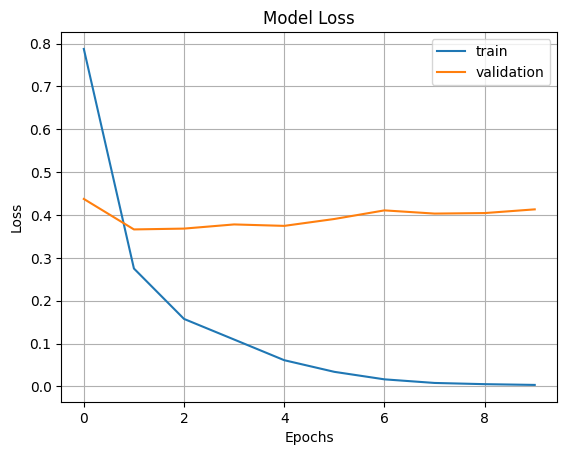

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

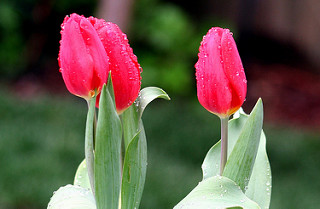

In [22]:
Image.open(roses[0])

In [23]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [24]:
pred=transfer_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[[5.3311664e-06 5.3838602e-07 1.7806698e-04 5.0601966e-07 9.9981552e-01]]


In [25]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is tulips


In [1]:
import cv2 as cv

cap = cv.VideoCapture(0)

if not cap.isOpened():
    print('Could not open Camera')
    exit()


while True:
    ret, frame = cap.read()

    if not ret:
        print('could not get frames')
        break

    cv.imshow('Video frame', frame)

    if cv.waitKey(1) == ord('q'):
        break


cap.release()
cv.destroyAllWindows()
